In [145]:
import pandas as pd
from sklearn.decomposition import PCA,TruncatedSVD
import numpy as np
import matplotlib.pyplot as plt

# I need to do this because the data type I chose is zipped
import zipfile
# Safe import for either Python 2.x or 3.x
try:
    from io import BytesIO
except ImportError:
    from cStringIO import StringIO as BytesIO

# What is PCA

## Let understand it using the convariance matrix

\begin{align*}
& \phi(x,y) = \phi \left(\sum_{i=1}^n x_ie_i, \sum_{j=1}^n y_je_j \right)
= \sum_{i=1}^n \sum_{j=1}^n x_i y_j \phi(e_i, e_j) = \\
& (x_1, \ldots, x_n) \left( \begin{array}{ccc}
\phi(e_1, e_1) & \cdots & \phi(e_1, e_n) \\
\vdots & \ddots & \vdots \\
\phi(e_n, e_1) & \cdots & \phi(e_n, e_n)
\end{array} \right)
\left( \begin{array}{c}
y_1 \\
\vdots \\
y_n
\end{array} \right)
\end{align*}

In [146]:
with zipfile.ZipFile('awesome-public-datasets/Datasets/titanic.csv.zip','r') as zipped:
    df = pd.read_csv(BytesIO(zipped.read('titanic.csv')),index_col=0)

In [147]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [148]:
pca_obj=PCA(n_components=len(df.columns))
pca_obj.fit(df.as_matrix())

ValueError: could not convert string to float: 'Q'

In [113]:
numdf=df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
pca_obj=PCA(n_components=len(numdf.columns))
pca_obj.fit(numdf.as_matrix())

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [114]:
numdf

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
6,0,3,NaN,0,0,8.4583
7,0,1,54.0,0,0,51.8625
8,0,3,2.0,3,1,21.0750
9,1,3,27.0,0,2,11.1333


In [115]:
matrix=numdf.as_matrix()
matrix[np.isfinite(matrix)==False]=0
pca_obj.fit(matrix)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [116]:
np.where(np.logical_not(np.isfinite(numdf.as_matrix())))

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888]),
 

In [117]:
numdf.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

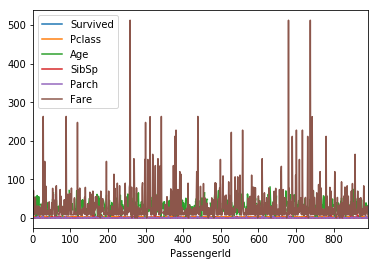

In [130]:
numdf.plot()
plt.show()

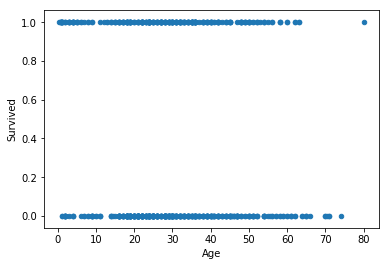

In [132]:
numdf.plot('Age','Survived',kind='scatter')
plt.show()

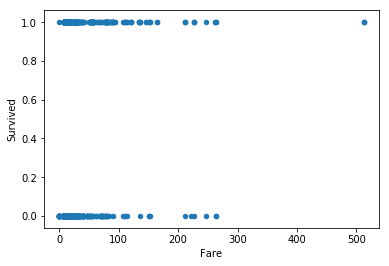

In [131]:
numdf.plot('Fare','Survived',kind='scatter')
plt.show()

In [133]:
pca_obj.singular_values_

array([ 1484.52886348,   519.51503507,    34.11260797,    20.46420499,
          19.60808186,    12.91716772])

In [97]:
svd_to_2D=TruncatedSVD()

In [99]:
fit=svd_to_2D.fit(matrix)

In [101]:
new_matrix=fit.transform(matrix)

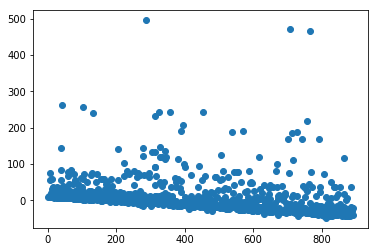

In [139]:
plt.scatter(new_matrix.T[0],new_matrix.T[1])
plt.show()

In [140]:
new_matrix

array([[   2.3066869 ,    9.84186172],
       [   7.48817208,   75.19082339],
       [   4.50198832,   10.88367787],
       ..., 
       [ 888.20483157,  -30.03986181],
       [ 890.61421671,  -20.40422843],
       [ 890.63343707,  -41.76695368]])

In [141]:
svd_to_2D.singular_values_

array([ 15404.31680674,   1561.23491477])

In [149]:
numdf.max()

Survived      1.0000
Pclass        3.0000
Age          80.0000
SibSp         8.0000
Parch         6.0000
Fare        512.3292
dtype: float64

In [150]:
numdf.min()

Survived    0.00
Pclass      1.00
Age         0.42
SibSp       0.00
Parch       0.00
Fare        0.00
dtype: float64